In [1]:
import os
import csv
import glob
import xarray
import matplotlib.pyplot as plt

In [2]:
# read segment COMID CSV file
COMID = []
with open('COMID.csv') as f:
    for row in csv.reader(f):
        COMID.append(row[0])

In [3]:
ds = xarray.open_dataset('hydroprop-fulltable2D.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:          (CatchId: 2638933, Stage: 83)
Coordinates:
  * CatchId          (CatchId) int64 101 179 181 ... 948100739 948100740
  * Stage            (Stage) float64 0.0 0.3048 0.6096 ... 24.38 24.69 24.99
Data variables:
    NumCells         (CatchId, Stage) int64 ...
    SurfaceArea      (CatchId, Stage) float64 ...
    BedArea          (CatchId, Stage) float64 ...
    Volume           (CatchId, Stage) float64 ...
    SLOPE            (CatchId, Stage) float64 ...
    LENGTHKM         (CatchId, Stage) float64 ...
    AREASQKM         (CatchId, Stage) float64 ...
    Roughness        (CatchId, Stage) float64 ...
    TopWidth         (CatchId, Stage) float64 ...
    WettedPerimeter  (CatchId, Stage) float64 ...
    WetArea          (CatchId, Stage) float64 ...
    HydraulicRadius  (CatchId, Stage) float64 ...
    Discharge        (CatchId, Stage) float64 ...
Attributes:
    Description:  Hydro property lookup table for all the COMIDs in CONUS thr...
    Subject:

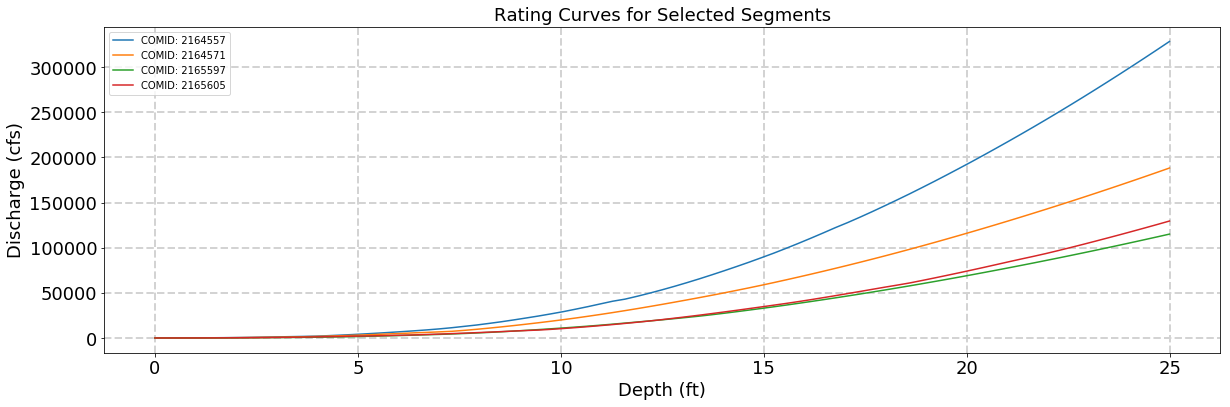

In [5]:
figsize=(20,6)
fontsize=18

fig,  ax = plt.subplots(figsize=figsize)
ax.set_xlabel('Depth (ft)', fontsize=fontsize)
ax.set_ylabel('Discharge (cfs)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(which='major', color='lightgrey', linestyle='--', linewidth=2)

for i in COMID:
    segment = ds.Discharge.sel(CatchId=int(i)).CatchId.values
    stage = ds.Discharge.sel(CatchId=int(i)).Stage.values
    discharge = ds.Discharge.sel(CatchId=int(i)).values
    ax.plot(stage, discharge, label = "COMID: " + str(segment))
    

ax.set_title("Rating Curves for Selected Segments", fontsize=fontsize)
ax.legend()    

In [6]:
len(ds.CatchId)

2638933

In [7]:
df = ds.to_dataframe()

In [8]:
df.head()

NumCells    SurfaceArea        BedArea         Volume  \
CatchId Stage                                                           
101     0.0000       980   88880.948314   88881.307531       0.000000   
        0.3048      3691  334742.253315  334754.918892   69934.613743   
        0.6096      5435  492906.700168  492961.818902  196897.153629   
        0.9144      6830  619421.055373  619547.124482  367072.468734   
        1.2192      8445  765888.320330  766095.724909  576350.967556   

                   SLOPE  LENGTHKM  AREASQKM  Roughness    TopWidth  \
CatchId Stage                                                         
101     0.0000  0.000123     3.251    4.5666       0.05   27.339572   
        0.3048  0.000123     3.251    4.5666       0.05  102.965935   
        0.6096  0.000123     3.251    4.5666       0.05  151.616949   
        0.9144  0.000123     3.251    4.5666       0.05  190.532469   
        1.2192  0.000123     3.251    4.5666       0.05  235.585457   

                WettedPerimeter     WetArea  HydraulicRadius  Discharge  
CatchId Stage                                                            
101     0.0000        27.339682    0.000000         0.000000   0.000000  
        0.3048       102.969830   21.511724         0.208913   1.680174  
        0.6096       151.633903   60.565104         0.399417   7.286888  
        0.9144       190.571247  112.910633         0.592485  17.669408  
        1.2192       235.649254  177.284210         0.752322  32.531810

In [9]:
catch_id = df.index.get_level_values(0).unique()
len(catch_id)

2638933

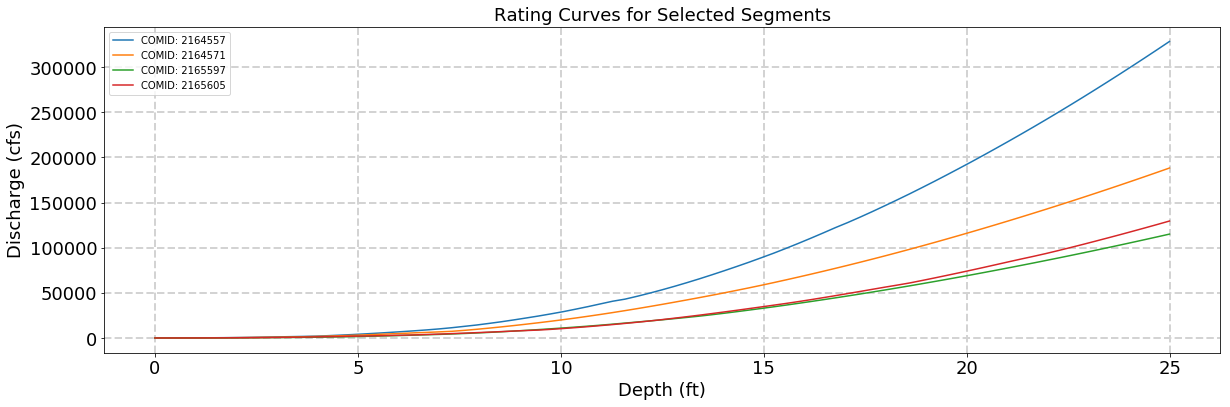

In [10]:
fig,  ax = plt.subplots(figsize=figsize)
ax.set_xlabel('Depth (ft)', fontsize=fontsize)
ax.set_ylabel('Discharge (cfs)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(which='major', color='lightgrey', linestyle='--', linewidth=2)

for i in COMID:
    slice_df = df.xs(int(i))
    stage = slice_df.index.values
    discharge = slice_df.Discharge.values
    ax.plot(stage, discharge, label = "COMID: " + i)

ax.set_title("Rating Curves for Selected Segments", fontsize=fontsize)
ax.legend()